# Assigment 1 
Trying to put all the code we learnt in introdution in one cell. 😂

In [1]:
# let's import packages
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# Let's import our data
heart_disease = pd.read_csv("data/heart-disease.csv")
# let's create X (Features)
X = heart_disease.drop("target", axis=1)
# let's create y (labels)
y = heart_disease["target"]
# let's pass RandomForestClassifier to clf
clf = RandomForestClassifier()
# keep default parameters
# clf.get_params()
# Slipt our data to trainings set and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# let's fit our data into our model
clf.fit(X_train, y_train)
# let's make some predictions
y_preds = clf.predict(X_test)
# Let's evaluate our model on train and test score
clf.score(X_train, y_train)
clf.score(X_test, y_test)
# classification report
# print(classification_report(y_test, y_preds))
# confusion_matrix(y_test, y_preds)
# accuracy_score(y_test, y_preds)
# let's improve our model
# we're going to try a number of n-estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set{clf.score(X_test, y_test) * 100:.2f}%")
    print("")
# let export our model
pickle.dump(clf, open("random_forest_model_assign.pk1", "wb"))
# import our saved model
loaded_model = pickle.load(open("random_forest_model_assign.pk1", "rb"))
loaded_model.score(X_test, y_test)

Trying model with 10 estimators..
Model accuracy on test set78.69%

Trying model with 20 estimators..
Model accuracy on test set81.97%

Trying model with 30 estimators..
Model accuracy on test set80.33%

Trying model with 40 estimators..
Model accuracy on test set81.97%

Trying model with 50 estimators..
Model accuracy on test set77.05%

Trying model with 60 estimators..
Model accuracy on test set80.33%

Trying model with 70 estimators..
Model accuracy on test set80.33%

Trying model with 80 estimators..
Model accuracy on test set85.25%

Trying model with 90 estimators..
Model accuracy on test set83.61%



0.8360655737704918

#👍 Dome!

# Assigment 2

Try and practise filling missing values in car_sales_missing_data
and using pandas. Goodluck👍

In [2]:
import numpy as np
import pandas as pd

# let's import our car_sales_missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

# check how many missing data 
car_sales_missing.isna().sum()

# let's create our X and y 
X = car_sales_missing.drop("Price", axis=1)
X.head()
y = car_sales_missing["Price"]
y.head()

# let's check for our missing data again
car_sales_missing.isna().sum()

# let's fill our missing data
# 1. Fill the "Make", "Colour", "Odometer (KM)", "Doors" columns
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

#let's confirm our data
car_sales_missing.isna().sum()

# let's drop rows in missing "Price"
car_sales_missing.dropna(inplace=True)

#let confirm our data
car_sales_missing.isna().sum()

#let's check our new length of data
len(car_sales_missing)

#let's import our new car_sales_missing data to X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Let's convert our data into numbers
# Turn our categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transform_X = transformer.fit_transform(car_sales_missing)
transform_X

pd.DataFrame(transform_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


# Assigment Try out other Estimator/model/algorithms

We have the -
    1. Lasso
    2. ElasticNet
    3. RidgeRegression
    4. SVR(kernel=linear)
    5. EnsembleRegressor(SVR='rbf')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
housing_df = pd.DataFrame(data=housing["data"], columns=housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
housing["target"]

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# Let's import our estimator/algorithm
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(26)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model(on the training data)
model = Lasso()
model.fit(X_train, y_train)

# Check the score of model(on the test data)
model.score(X_test, y_test)

0.29355308333746477

In [8]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(26)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model(on the training data)
model_2 = ElasticNet()
model_2.fit(X_train, y_train)

# Check the score of model (on the test data)
model_2.score(X_test, y_test)

0.4334786017803163

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Instantiate and fit the model(on the training data)
model_4 = Ridge()
model_4.fit(X_train, y_train)

# Check the score of model (on the test data)
model_4.score(X_test, y_test)

0.6095762645637185

In [10]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1698,5.1046,27.0,6.094286,0.991429,850.0,2.428571,37.98,-122.29
17643,5.4609,28.0,6.803598,1.026987,1996.0,2.992504,37.27,-121.90
1476,2.9097,16.0,4.203463,1.043290,1705.0,2.460317,37.96,-122.04
7077,4.3125,34.0,4.996711,0.990132,758.0,2.493421,33.94,-117.99
18609,4.0781,30.0,5.685259,1.239044,686.0,2.733068,37.12,-122.04


In [11]:
y_train.head()

1698     2.098
17643    2.636
1476     1.063
7077     2.140
18609    1.545
Name: target, dtype: float64

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate and fit the model (on the training data)
model_5 = RandomForestRegressor(n_estimators=10)
model_5.fit(X_train, y_train)

# Check the score of model (on the test data)
model_5.score(X_test, y_test)

0.7983033480723869

In [13]:
from sklearn.svm import SVR

# Instantiate and fit the model(on the training data)
model_3 = SVR()
model_3.fit(X_train, y_train)

# Check the score of model ( on the test data)
model_3.score(X_test, y_test)

-0.025277785576983014

# Assignments Practise with a Toy data set using the `classification problems`

In [14]:
# The load Iris toy-data set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

iris_plants = datasets.load_iris()
iris_plants

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
iris_plants_df = pd.DataFrame(iris_plants["data"], columns=iris_plants["feature_names"])
iris_plants_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
# Check total number of samples
len(iris_plants_df)

150

In [17]:
# pass our labels values to column target
iris_plants_df["target"] = iris_plants["target"]
iris_plants_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# check for the numbers of classification in target
iris_plants_df["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [19]:
iris_plants_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
# Import our Algorithm/Estimator
from sklearn import svm

# Split our data into X and y sample
X = iris_plants_df.drop("target", axis=1)
y = iris_plants_df["target"]

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Intatiate and fit the model into our data
model_6 = svm.SVC(decision_function_shape='ovo')
model_6.fit(X_train, y_train)

# Score our model
model_6.score(X_test, y_test)

0.9

In [21]:
# try other model
model_7 = svm.LinearSVC()
# fit our data
model_7.fit(X_train, y_train)
# score our model
model_7.score(X_test, y_test)

C:\Users\josep\Documents\ml-course\sample-project\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8666666666666667

In [22]:
from sklearn.datasets import load_iris
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.naive_bayes import GaussianNB
>>> X, y = load_iris(return_X_y=True)
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
>>> gnb = GaussianNB()
>>> y_pred = gnb.fit(X_train, y_train).predict(X_test)
>>> print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
Number of mislabeled points out of a total 75 points : 4

SyntaxError: invalid syntax (1299913244.py, line 9)

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=26)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.9733333333333334

### Assigment Learning Random Forest Classifier in Python

In [26]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [27]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

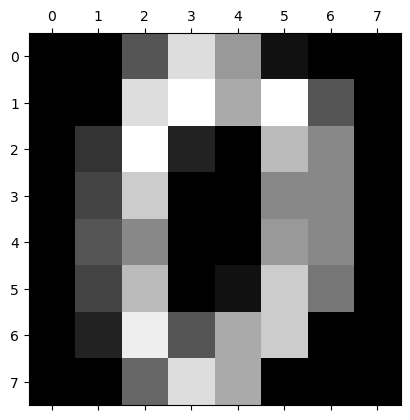

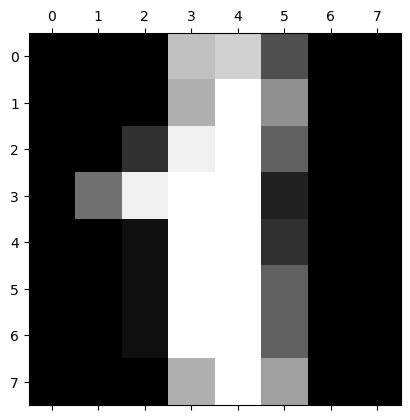

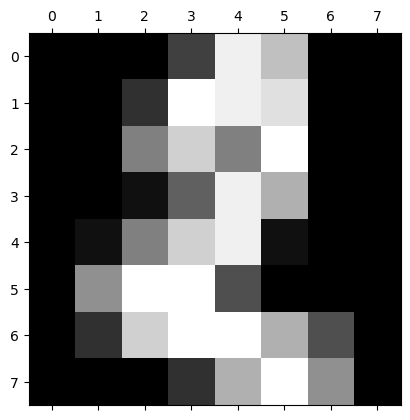

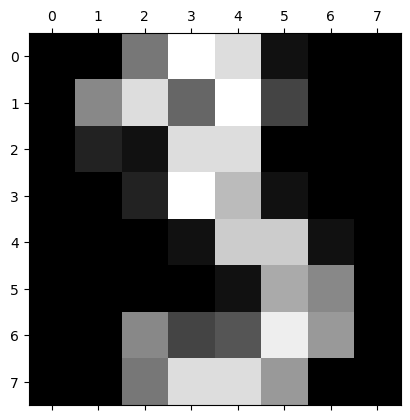

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [29]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [30]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [31]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [32]:
df["target"] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), digits.target,test_size=0.2)


In [34]:
len(X_test)

360

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [36]:
model.score(X_test, y_test)

0.9611111111111111

In [37]:
y_predicted = model.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 26,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  1,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  3,  0,  0,  0,  2,  0,  0, 25,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 38]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

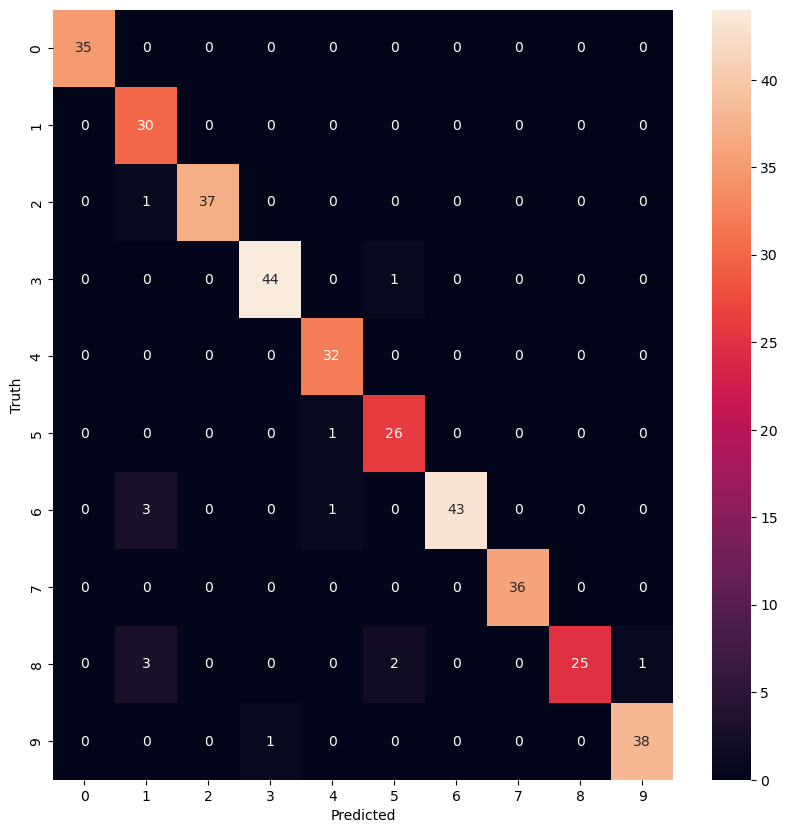

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [41]:
# Assingment 
# Using Regression try to predict on our model 

car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [42]:
# create our features and labels
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [43]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [44]:
# let's build a model and try to fix our data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(26)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit our model
model = RandomForestRegressor()
# model.fit(X_train, y_train)

# score our model
# model.score(X_test, y_test)



yes, we get an error why, we have to turn our data to one-hot becasuse computer 
dont understand letters

In [45]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [47]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Set random seed
np.random.seed(26)

#Split the data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

#instantiate and fit our model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# score our model
model.score(X_test, y_test)
model.predict(X_test[:5])
# model.predict_proba(X_test) has no attribute predict_proba

array([16508.67,  9430.96, 11637.37, 14037.72, 15763.5 ])

In [49]:
from sklearn.linear_model import Ridge
model_2 = Ridge()
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.3255050496347368

## Assignment
Read through the documentation of `Metric and scoring`
https://scikit-learn.org/stable/modules/model_evaluation.html

In [50]:
# Done

## Assignment Try the `score()` on regression problem

In [51]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [52]:
from sklearn.ensemble import RandomForestRegressor
# set random seed()
np.random.seed(26)

# Create X and y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create an instance of our model
model = RandomForestRegressor()

# Fit our model instance to data
model.fit(X_train, y_train)

# Score our model
model.score(X_test, y_test)

0.8227312403591236

In [53]:
model.score(X_train, y_train)

0.9732753290466359

In [55]:
y_preds = model.predict(X_test)
y_preds

array([2.2158601, 1.3921   , 2.136    , ..., 2.2113201, 3.36991  ,
       1.54232  ])

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)

0.8227312403591236

In [58]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_preds)

0.23012851000670292

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.31524374556686063

In [61]:
df = pd.DataFrame(data={"actual value" : y_test,
                        "predicted value" : y_preds})
df["difference"] = df["predicted value"] - df["actual value"]
df.head(10)

,actual value,predicted value,difference
14025,2.14800,2.215860,0.067860
13313,1.13200,1.392100,0.260100
3802,1.40500,2.136000,0.731000
18687,2.28600,2.253410,-0.032590
8706,3.58500,2.704890,-0.880110
4076,4.90800,4.975929,0.067929
19050,0.98100,1.186720,0.205720
2519,0.85400,0.950000,0.096000
10758,5.00001,2.456700,-2.543310
3225,0.70500,0.924460,0.219460


In [62]:
# MAE using formulas and difference
np.abs(df["difference"]).mean()

0.31524374556686063

In [66]:
df["squared"] = np.square(df["difference"])
df.head(10)

,actual value,predicted value,difference,squared
14025,2.14800,2.215860,0.067860,0.004605
13313,1.13200,1.392100,0.260100,0.067652
3802,1.40500,2.136000,0.731000,0.534361
18687,2.28600,2.253410,-0.032590,0.001062
8706,3.58500,2.704890,-0.880110,0.774594
4076,4.90800,4.975929,0.067929,0.004614
19050,0.98100,1.186720,0.205720,0.042321
2519,0.85400,0.950000,0.096000,0.009216
10758,5.00001,2.456700,-2.543310,6.468425
3225,0.70500,0.924460,0.219460,0.048163


In [65]:
np.abs(df["squared"]).mean()

0.23012851000670292

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

np.random.seed(26)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_r2

array([0.51928502, 0.70360074, 0.73975496, 0.62333077, 0.68269162])

### 5.1 Turning hyperparameters by hand

In [75]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [132]:
# let's create a function
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error

def evaluate_preds(y_true, y_preds):
    """
    Performing a evaluation comparision of y_true labels vs y_preds labels
    on a regression 
    """
    r2 = r2_score(y_true, y_preds)
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    mxe = max_error(y_true, y_preds)
    
    metric_dict = {"r2": round(r2, 2),
                   "mae": round(mae, 2),
                   "mse": round(mse, 2),
                   "mxe": round(mxe, 2)}
    print(f"R2 score: {r2:.2f}")
    print(f"Mean AbsoLute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Max_error: {mxe:.2f}")
    
    return metric_dict

In [121]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(26)

# Create X and y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split our data
train_split = round(0.7 * len(housing_df))
valid_split = round((0.7 + 0.15) * len(housing_df))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

# Instantiate a model
model = RandomForestRegressor(n_estimators=10)

# Fit model
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10)

In [133]:
# Make a prediction
y_preds = model.predict(X_valid)
y_preds

array([3.147302, 3.6769  , 3.9833  , ..., 1.7352  , 1.2709  , 1.2312  ])

In [135]:
# Evaluate our model prediction
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics;

R2 score: 0.44
Mean AbsoLute Error: 0.66
Mean Squared Error: 0.83
Max_error: 3.69


In [136]:
model.score(X_valid, y_valid)

0.4419945255805735

Since our model perform poorly, while dont we tune the hyperparameters

Three ways to tune our hyperparameters:

1. By hand
2. GridSearchCV
3. RandomSearchCV

### Turning by hand

1. lets increase our n_estimators rate to 100

In [139]:
# instantiate model_2
model_2 = RandomForestRegressor(n_estimators=100)

# fit model
model_2.fit(X_train, y_train)

RandomForestRegressor()

In [140]:
# Make some prediction with model_2
y_preds = model_2.predict(X_valid)
y_preds

array([3.4510608, 3.2281102, 3.9785305, ..., 1.65838  , 1.34294  ,
       1.34608  ])

In [142]:
# let;s evalute our model
model_2_metrics = evaluate_preds(y_valid, y_preds)
model_2_metrics;

R2 score: 0.48
Mean AbsoLute Error: 0.62
Mean Squared Error: 0.77
Max_error: 3.79


Seem's like our model imporve fairly but its still much as guessing the data


In [143]:
model_2.score(X_valid, y_valid)

0.4818630905201632

Some ways to improve our model is by adding more data and also using the cross_val_score

### Improving model using RandomizedSearchCV

In [146]:
from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV()
RandomForestRegressor()

In [152]:
grid = {"n_estimators": [10, 100, 500],
        "max_depth": [None, 5],
        "max_features": ["log2", "sqrt"],
        "min_samples_split": [2, 4],
        "min_samples_leaf": [1, 2]}

In [153]:
RandomForestRegressor()

RandomForestRegressor()

In [154]:
# instantiate RandomizedSearchCV
rs_model_2 = RandomizedSearchCV(estimator=model_2,
                                param_distributions=grid,
                                verbose=2,
                                cv=5,
                                n_iter=10)
# fit model
rs_model_2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  14.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  14.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  16.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  15.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  15.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 5],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [10, 100, 500]},
                   verbose=2)

In [155]:
# Check best params
rs_model_2.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [156]:
# Make prediction
rs_y_preds = rs_model_2.predict(X_valid)
rs_y_preds

array([3.11302144, 3.02526282, 3.56129192, ..., 1.65965261, 1.37811646,
       1.42729658])

In [157]:
# Evaluate model
rs_metrics = evaluate_preds(y_valid, rs_y_preds)

R2 score: 0.39
Mean AbsoLute Error: 0.69
Mean Squared Error: 0.91
Max_error: 4.07


This is so bad.😂

### Hyperparameter tuning using GridSearchCV


In [162]:
from sklearn.model_selection import GridSearchCV

gs_model_2 = GridSearchCV(estimator=model_2,
                          param_grid=grid,
                          verbose=2,
                          cv=3)

In [163]:
# Fit our model
gs_model_2.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  12.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 1.1min
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   6.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   6.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=  34.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=  34.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=  33.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=5, max_features=l

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   5.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   5.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   5.0s


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [166]:
y_preds = gs_model_2.predict(X_valid)
y_preds

array([3.20116991, 3.32612779, 3.7572999 , ..., 1.77104799, 1.46580921,
       1.56171451])

In [167]:
gs_metric = evaluate_preds(y_valid, y_preds)
gs_metric;

R2 score: 0.44
Mean AbsoLute Error: 0.65
Mean Squared Error: 0.83
Max_error: 4.07


In [170]:
gs_model_2.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

Let's improve our model by adding more data:

We can adjust the  train_test_split 

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [177]:
np.random.seed(42)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate model
model_3 = RandomForestRegressor(n_estimators=100)

# fit model
model_3.fit(X_train, y_train)


RandomForestRegressor()

In [179]:
# Make prediction
y_preds = model_3.predict(X_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [180]:
# Evaluate our metric
model_3_metric = evaluate_preds(y_test, y_preds)
model_3_metric;

R2 score: 0.81
Mean AbsoLute Error: 0.33
Mean Squared Error: 0.25
Max_error: 3.14


Wow! that's amazing, by simplying adding more data, our model predicted very well.

Let's try using the `cross_val_score` to see which of our split makes our model get a better performers.  

In [185]:
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(model_3, X, y, cv=5)
cv_acc

array([0.50097272, 0.70273041, 0.74115332, 0.61556377, 0.68253631])

wow, i didnt even get a better performance ... so let's try adjusting `model_3` hyperparameters by hand

In [188]:
# Make model_4 
model_4 = RandomForestRegressor(n_estimators=100,
                                max_features='log2',
                                min_samples_leaf=1,
                                min_samples_split=4)


In [189]:
# Fit model
model_4.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', min_samples_split=4)

In [191]:
y_preds = model_4.predict(X_test)
y_preds

array([0.49126715, 0.79978727, 4.85403502, ..., 4.86671179, 0.73817373,
       1.77628007])

In [192]:
# Evaluate our model 
model_4_metric = evaluate_preds(y_test, y_preds)
model_4_metric;

R2 score: 0.81
Mean AbsoLute Error: 0.32
Mean Squared Error: 0.24
Max_error: 3.29


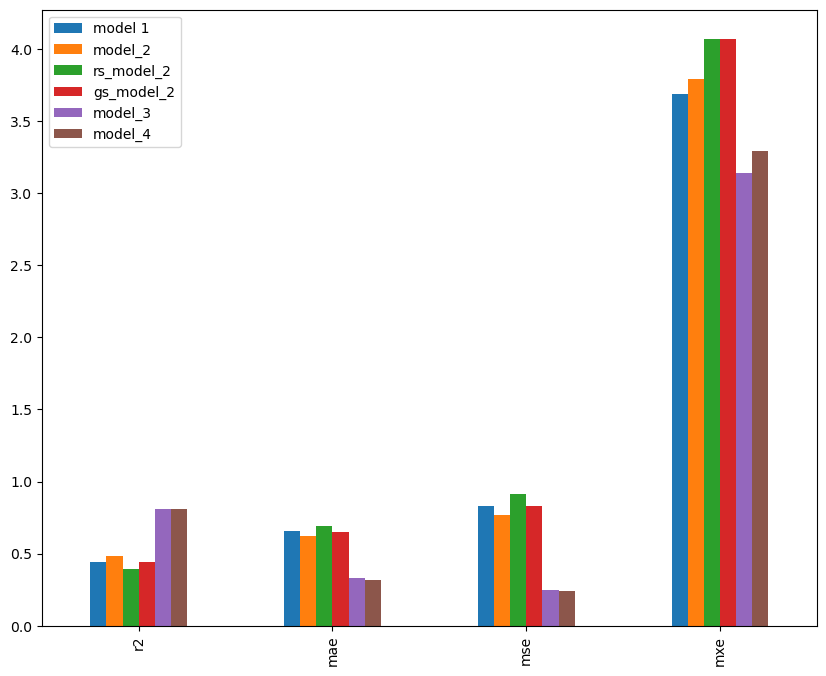

In [196]:
# Let's visualize our data, visualized, visualized, visualized
compare_metric = pd.DataFrame({"model 1": baseline_metrics,
                               "model_2": model_2_metrics,
                               "rs_model_2": rs_metrics,
                               "gs_model_2": gs_metric,
                               "model_3": model_3_metric,
                               "model_4": model_4_metric})

compare_metric.plot.bar(figsize=(10, 8));

wow, let's confirm our data,

model 3 amd model 4 perform way better

## Saving our model

Since model 3 and mode 4 perform very well, let's save our model to 